In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm, metrics

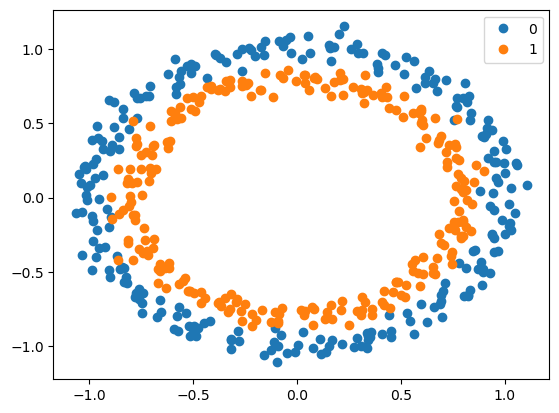

In [21]:
#in this project, i will be creating a mesh of plots

def make_meshgrid(x, y, h=.02):
    """ create a mesh of points toplot in 

    parameters

    ------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns :

    ----
    xx, yy: ndarray
    
    
    """

    x_min, x_max = x.min() -1, x.max() +1
    y_min, y_max = y.min() -1, y.max() +1

    xx, yy = np.meshgrid(np.arange(x_min, y_max, h),
                        np.arange(y_min, y_max, h)
                        )

    return xx, yy

    def plot_contours (ax, clf, xx, yy, **params):
        """plot the decision boundaries for a classifier.

        parameters
        ----------

        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params : dictionary of params to pass to contourf, optional
        
        """
        z = clf.prediction(np.c_[xx.ravel(), yy.ravel()])
        z = z.reshape(xx.shape)
        out = ax.contourf(xx, yy, z, **params)

        return out
samples =500
train_prop = 0.8

#Make data

x,y = make_circles(n_samples = samples, noise = 0.05, random_state = 123)

#plot

df = pd.DataFrame(dict(x=x[:,0], y=x[:, 1], label = y))

groups = df.groupby('label')

fig, ax = plt.subplots()
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker = 'o', linestyle= '', ms = 6, label=name)
ax.legend()
plt.show()



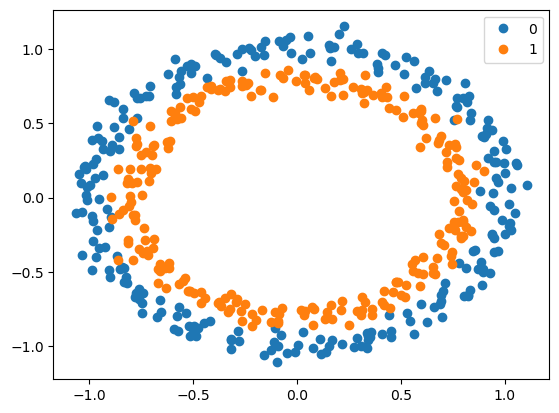

In [22]:
samples =500
train_prop = 0.8

#Make data

x,y = make_circles(n_samples = samples, noise = 0.05, random_state = 123)

#plot

df = pd.DataFrame(dict(x=x[:,0], y=x[:, 1], label = y))

groups = df.groupby('label')

fig, ax = plt.subplots()
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker = 'o', linestyle= '', ms = 6, label=name)
ax.legend()
plt.show()


NameError: name 'plot_contours' is not defined

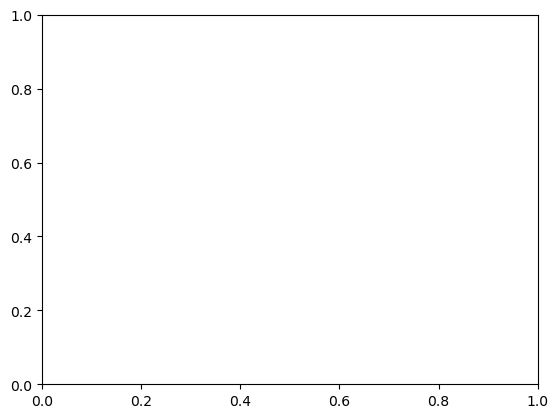

In [24]:
#linear

C= 1.0 #SVM regularization parameter
models = svm.SVC(kernel = 'linear', C=C)
models.fit(x,y)

#title for the plots
titles = ('SVC with linear kernels')

#Set-up 2x2 grid for plotting.
fig,sub = plt.subplots()
plt.subplots_adjust(wspace =0.4, hspace=0.4)

x0, x1 = x[:, 0], x[:, 1]   # take first and second column
xx, yy = make_meshgrid(x0, x1)

plot_contours(sub, models, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
sub.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')



plot_contours(sub, models, xx, yy, cmap =plt.cm.coolwarm, alpha = 0.8)

sub.scatter(x0,x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')
sub.set_xlim(0.25, 1.25)
sub.set_ylim(0.25, 1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)

plt.show()

